Download a real world dataset containing at least 1000 samples and more than 10 features. Perform exploratory data analysis to understand the dataset's structure. Apply Principal Component Analysis to reduce dimensionality and analyze variance explained by principal components. Visualize the dataset using different sets of principal components and interpret the results. 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

The obesity dataset includes data from individuals in Mexico, Peru, and Colombia, covering 16 lifestyle and health related features. This dataset helps estimate obesity levels based on eating habits, family history and physical condition. 

Column Descriptions:
* Gender – Male or Female.
* Age – The person’s age in years.
* Height – Height in meters.
* Weight – Weight in kilograms.
* family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).
* FAVC – If the person frequently consumes high-calorie foods (yes/no).
* FCVC – Frequency of vegetable consumption (scale from 1 to 3).
* NCP – Number of main meals per day.
* CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
* SMOKE – Whether the person smokes (yes/no).
* CH2O – Daily water intake (scale from 1 to 3).
* SCC – If the person monitors their calorie intake (yes/no).
* FAF – Physical activity frequency (scale from 0 to 3).
* TUE – Time spent using technology (scale from 0 to 3).
* CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
* MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).
* NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).

In [17]:
dataset = pd.read_csv("datasets/Obesity.csv")

In [18]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [36]:
dataset.shape

(2111, 17)

The dataset has 2111 rows and 17 features

Checking for missing values

In [34]:
dataset.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [20]:
for column in dataset[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]]:
    print(f"Unique values in {column}: {dataset[column].unique()}")

Unique values in Gender: ['Female' 'Male']
Unique values in family_history_with_overweight: ['yes' 'no']
Unique values in FAVC: ['no' 'yes']
Unique values in CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
Unique values in SMOKE: ['no' 'yes']
Unique values in SCC: ['no' 'yes']
Unique values in CALC: ['no' 'Sometimes' 'Frequently' 'Always']
Unique values in MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Unique values in NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
dataset["Gender"] = dataset["Gender"].apply(lambda x: 1 if x == "Male" else 0)
dataset["family_history_with_overweight"] = dataset["family_history_with_overweight"].apply(lambda x: 1 if x == "yes" else 0)
dataset["FAVC"] = dataset["FAVC"].apply(lambda x: 1 if x == "yes" else 0)
caec = {}

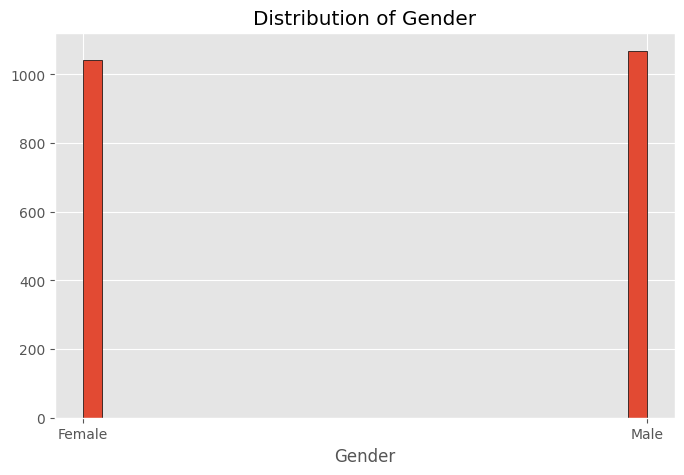

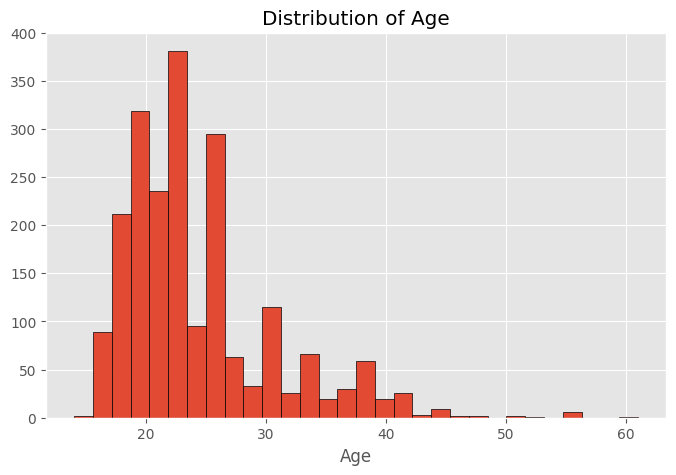

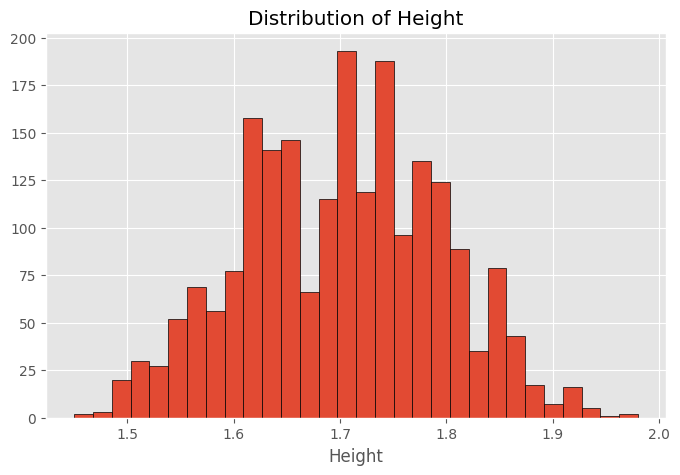

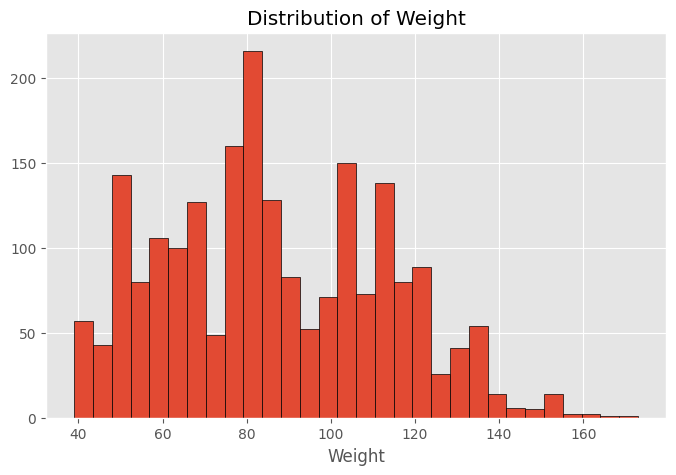

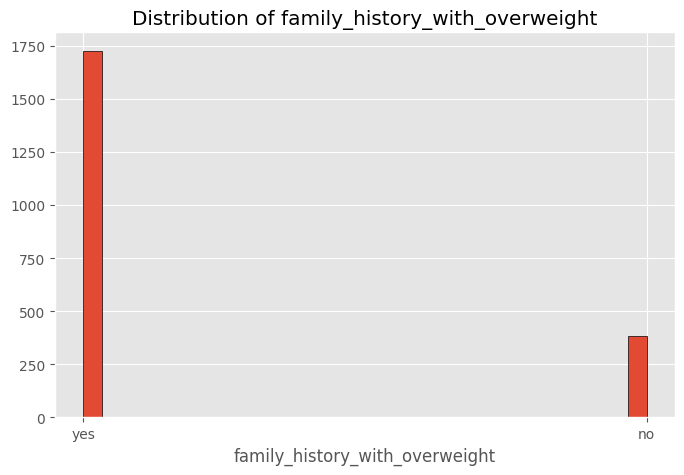

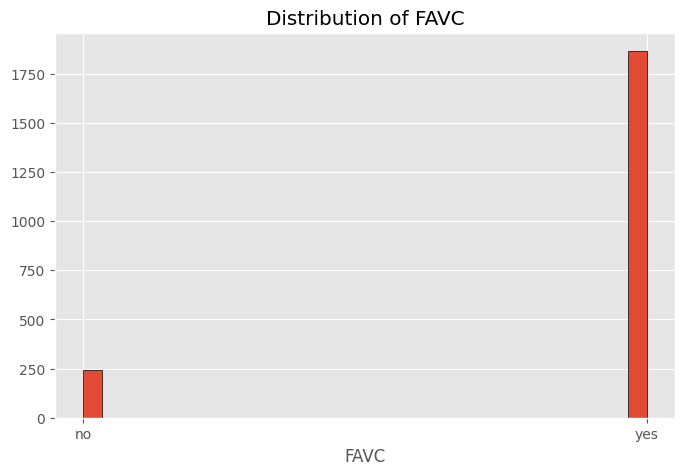

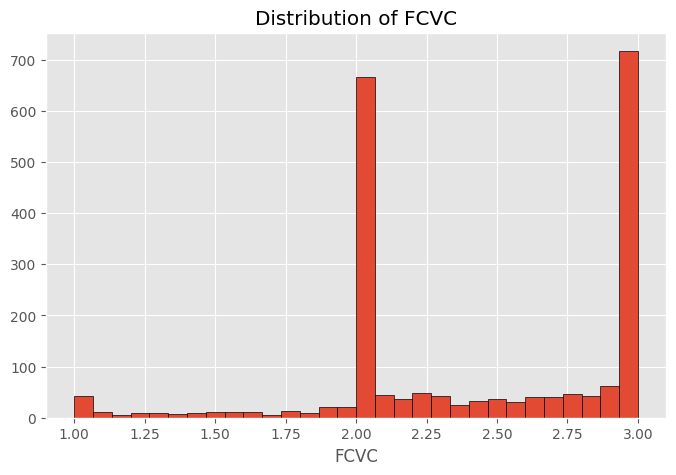

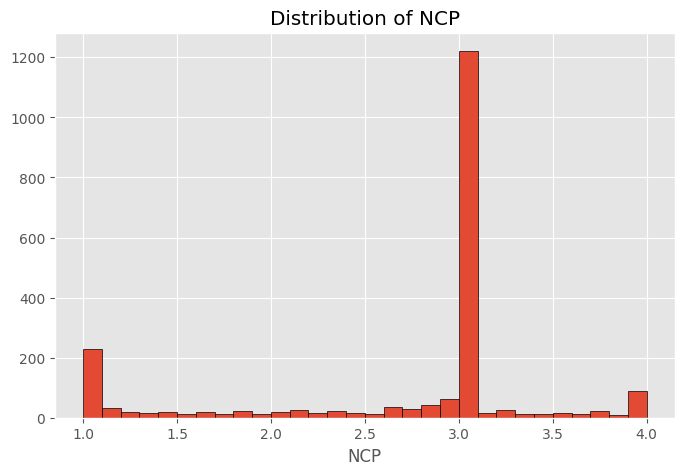

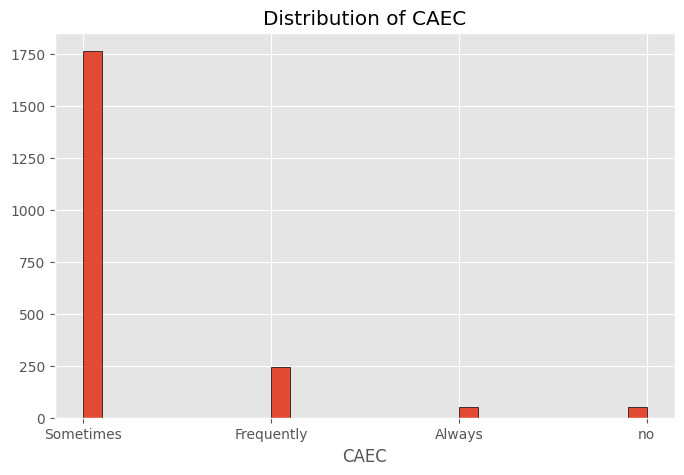

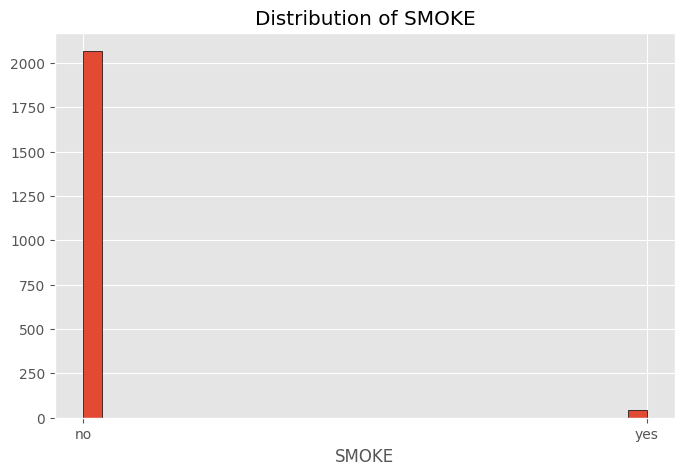

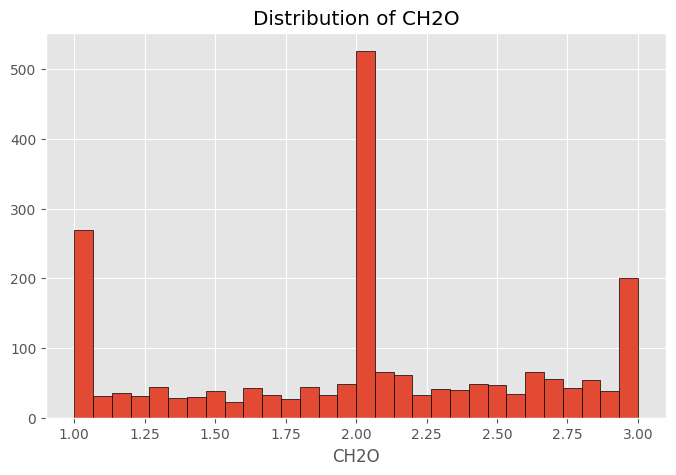

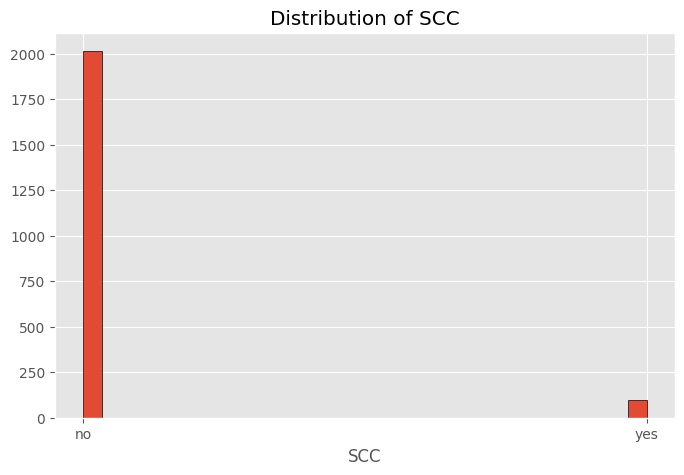

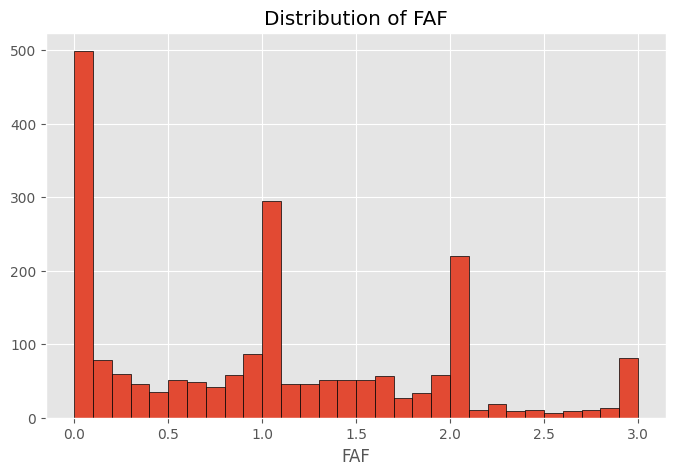

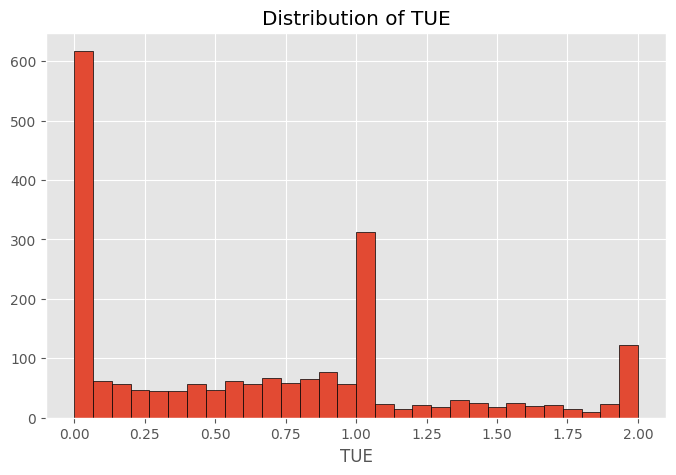

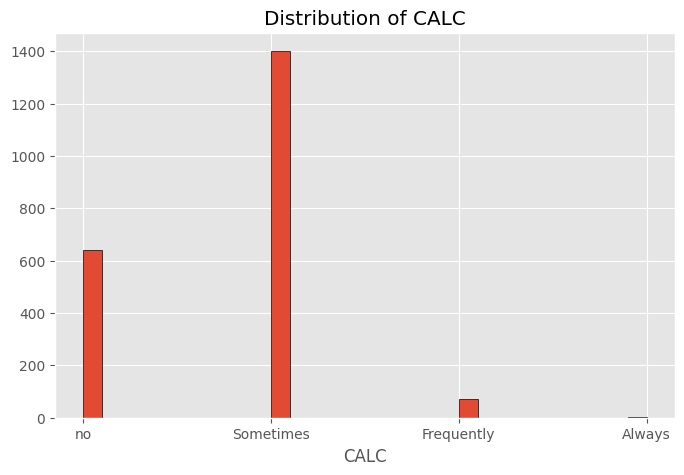

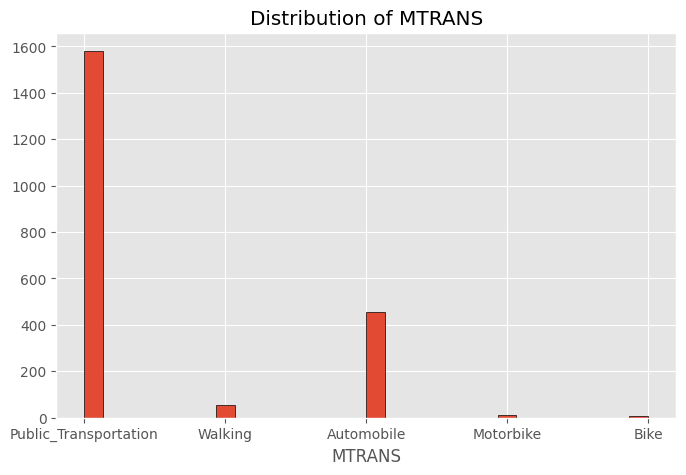

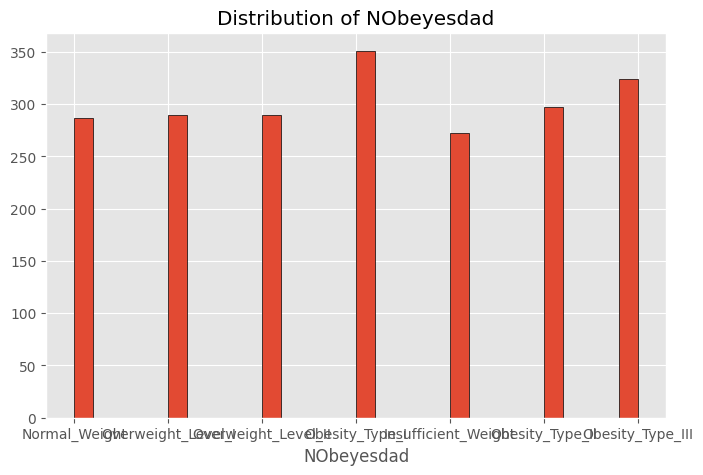

In [33]:

for column in dataset.columns:
    plt.figure(figsize=(8, 5))
    plt.title(f"Distribution of {column}")
    plt.hist(dataset[column], bins=30, edgecolor='black')
    plt.xlabel(column)

In [37]:
corr = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")

ValueError: could not convert string to float: 'Female'